In [20]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '7c9fed33008f48a5afaad08b300628f1' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [16]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [58]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    total_age_in_days = 0
    for player in players:
        date = player['dateOfBirth'].split('-')
        my_date = datetime.date.today()
        days = datetime.date(int(date[0]), int(date[1]), int(date[2]))
        age = my_date - days
        age = str(age)
        age = int(age.split()[0])
        total_age_in_days += age
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
    print('Team "{}", {} total_age_in_days, {} goals'.format(team['name'], total_age_in_days, goals))
    team['total_age'] = total_age_in_days
    team['goals'] = goals

Team "FC Rio Ave", 250019 total_age_in_days, 6 goals
Team "FC Porto", 245401 total_age_in_days, 12 goals
Team "Moreirense FC", 253577 total_age_in_days, 3 goals
Team "FC Paços de Ferreira", 250005 total_age_in_days, 5 goals
Team "Sporting CP", 257429 total_age_in_days, 13 goals
Team "Maritimo Funchal", 277955 total_age_in_days, 5 goals
Team "CD Tondela", 255048 total_age_in_days, 8 goals
Team "SL Benfica", 295134 total_age_in_days, 17 goals
Team "Boavista Porto FC", 343113 total_age_in_days, 3 goals
Team "FC Arouca", 220175 total_age_in_days, 0 goals
Team "Vitoria Setubal", 253435 total_age_in_days, 5 goals
Team "C.F. Os Belenenses", 255515 total_age_in_days, 3 goals
Team "Vitoria Guimaraes", 230026 total_age_in_days, 4 goals
Team "Sporting Braga", 287746 total_age_in_days, 5 goals
Team "GD Estoril Praia", 247423 total_age_in_days, 7 goals
Team "Feirense", 272843 total_age_in_days, 7 goals
Team "Nacional Funchal", 173137 total_age_in_days, 0 goals
Team "G.D. Chaves", 246922 total_age_i

In [64]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'], 'total_age': team['total_age'], 'goals': team['goals']})
team_for_pd

[{'goals': 6, 'name': 'FC Rio Ave', 'total_age': 250019},
 {'goals': 12, 'name': 'FC Porto', 'total_age': 245401},
 {'goals': 3, 'name': 'Moreirense FC', 'total_age': 253577},
 {'goals': 5, 'name': 'FC Paços de Ferreira', 'total_age': 250005},
 {'goals': 13, 'name': 'Sporting CP', 'total_age': 257429},
 {'goals': 5, 'name': 'Maritimo Funchal', 'total_age': 277955},
 {'goals': 8, 'name': 'CD Tondela', 'total_age': 255048},
 {'goals': 17, 'name': 'SL Benfica', 'total_age': 295134},
 {'goals': 3, 'name': 'Boavista Porto FC', 'total_age': 343113},
 {'goals': 0, 'name': 'FC Arouca', 'total_age': 220175},
 {'goals': 5, 'name': 'Vitoria Setubal', 'total_age': 253435},
 {'goals': 3, 'name': 'C.F. Os Belenenses', 'total_age': 255515},
 {'goals': 4, 'name': 'Vitoria Guimaraes', 'total_age': 230026},
 {'goals': 5, 'name': 'Sporting Braga', 'total_age': 287746},
 {'goals': 7, 'name': 'GD Estoril Praia', 'total_age': 247423},
 {'goals': 7, 'name': 'Feirense', 'total_age': 272843},
 {'goals': 0, 'na

In [65]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals,name,total_age
0,6,FC Rio Ave,250019
1,12,FC Porto,245401
2,3,Moreirense FC,253577
3,5,FC Paços de Ferreira,250005
4,13,Sporting CP,257429
5,5,Maritimo Funchal,277955
6,8,CD Tondela,255048
7,17,SL Benfica,295134
8,3,Boavista Porto FC,343113
9,0,FC Arouca,220175


In [66]:
del teams_pd['name']
teams_pd

,goals,total_age
0,6,250019
1,12,245401
2,3,253577
3,5,250005
4,13,257429
5,5,277955
6,8,255048
7,17,295134
8,3,343113
9,0,220175


In [67]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[  1.40604024,   7.48728612],
       [  2.81208048,   7.34899148],
       [  0.70302012,   7.59383708],
       [  1.1717002 ,   7.48686687],
       [  3.04642052,   7.70919242],
       [  1.1717002 ,   8.32388184],
       [  1.87472032,   7.63788892],
       [  3.98378068,   8.8383391 ],
       [  0.70302012,  10.2751599 ],
       [  0.        ,   6.59355178],
       [  1.1717002 ,   7.58958462],
       [  0.70302012,   7.65187411],
       [  0.93736016,   6.88855838],
       [  1.1717002 ,   8.61709163],
       [  1.64038028,   7.40954405],
       [  1.64038028,   8.17079345],
       [  0.        ,   5.18491098],
       [  0.70302012,   7.39454067]])

In [68]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 0.93736016,  7.17440396],
        [ 3.28076056,  7.96550767],
        [ 1.1717002 ,  8.84673171]]),
 array([0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0]))

In [69]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'g',
 'r',
 'r',
 'g',
 'b',
 'r',
 'g',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r']

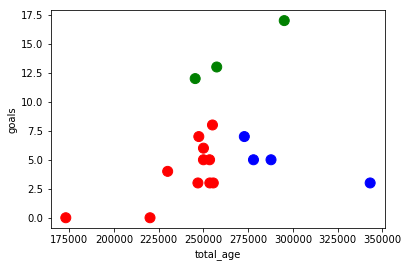

In [71]:
teams_pd.plot.scatter(x='total_age', y='goals', c=colors, s = 100)

In [72]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[  3.28076056,   7.96550767],
        [  0.        ,   5.88923138],
        [  1.64038028,   7.67637814],
        [  0.96665266,   7.6932794 ],
        [  0.70302012,  10.2751599 ]]),
 array([2, 0, 3, 3, 0, 3, 2, 0, 4, 1, 3, 3, 3, 3, 2, 2, 1, 3]))

In [74]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'r',
 'y',
 'y',
 'r',
 'y',
 'b',
 'r',
 'm',
 'g',
 'y',
 'y',
 'y',
 'y',
 'b',
 'b',
 'g',
 'y']

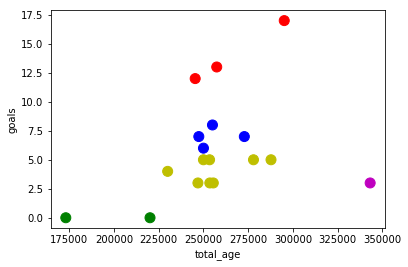

In [75]:
teams_pd.plot.scatter(x='total_age', y='goals', c=colors, s = 100)